## Nearest Neighbor
We will project our data onto a space and then use the nearest neighbor algorithm to see if we can classify distinct clusters as certain types.

In [122]:
## code
import pandas as pd
import math, sys, copy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pokemon_final.csv')
data.head()

,id,Name,Type 1,Type 2,Generation,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,grass,poison,1,0.7,6.9,64,45,49,49,45,65,65
1,2,ivysaur,grass,poison,1,1.0,13.0,142,60,62,63,60,80,80
2,3,venusaur,grass,poison,1,2.0,100.0,236,80,82,83,80,100,100
3,4,charmander,fire,NaN,1,0.6,8.5,62,39,52,43,65,60,50
4,5,charmeleon,fire,NaN,1,1.1,19.0,142,58,64,58,80,80,65


In [3]:
types = []
for pType in data['Type 1']:
    try:
        index = types.index(pType)
    except ValueError:
        types.append(pType)

# for pType in data['Type 2']:
#     try:
#         index = types.index(pType)
#     except ValueError:
#         types.append(pType)
        
        

print(types)
print(len(types))

['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying']
18


In [4]:
gen = []
for eachGen in data['Generation']:
    try:
        index = gen.index(eachGen)
    except ValueError:
        gen.append(eachGen)
        
print(gen)

[1, 2, 3, 4, 5, 6, 7]


## Normalizaton

In [5]:
newData = data.copy()
newData.head()

,id,Name,Type 1,Type 2,Generation,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,grass,poison,1,0.7,6.9,64,45,49,49,45,65,65
1,2,ivysaur,grass,poison,1,1.0,13.0,142,60,62,63,60,80,80
2,3,venusaur,grass,poison,1,2.0,100.0,236,80,82,83,80,100,100
3,4,charmander,fire,NaN,1,0.6,8.5,62,39,52,43,65,60,50
4,5,charmeleon,fire,NaN,1,1.1,19.0,142,58,64,58,80,80,65


### ColumnAverage

In [6]:
variables = ['Generation', 'height', 'weight', 'base_experience', 
             'hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']


In [7]:
for column in variables:
    colAvg = 0
    newData[column] = data[column].astype('float64')

    for value in newData[column]:
        colAvg += value
    
    colAvg = colAvg / newData.shape[0]
#     print(colAvg)
    for i, row in newData.iterrows():
        newData.at[i, column] = newData.at[i, column] / colAvg

newData.head()

,id,Name,Type 1,Type 2,Generation,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,grass,poison,0.269179,0.602175,0.111703,0.441840,0.654560,0.644002,0.683154,0.683576,0.935427,0.928391
1,2,ivysaur,grass,poison,0.269179,0.860249,0.210454,0.980332,0.872747,0.814859,0.878341,0.911435,1.151295,1.142635
2,3,venusaur,grass,poison,0.269179,1.720499,1.618879,1.629285,1.163663,1.077717,1.157179,1.215247,1.439118,1.428293
3,4,charmander,fire,NaN,0.269179,0.516150,0.137605,0.428032,0.567286,0.683431,0.599502,0.987388,0.863471,0.714147
4,5,charmeleon,fire,NaN,0.269179,0.946274,0.307587,0.980332,0.843655,0.841145,0.808631,1.215247,1.151295,0.928391


## Euclidean Distance Function

In [106]:
def calcEuclid(row1, row2):
    eDist = 0
    d = []
    for i in range(4, 14):
        d.append(pow(row1[i] - row2[i], 2))
#     d.append(pow(row1[5] - row2[5], 2))
#     d.append(pow(row1[6] - row2[6], 2))
    for num in d:
        eDist += num
    return pow(eDist, 1/2)


## Manhattan Distance Function

In [9]:
def calcMan(row1, row2):
    man = 0
    for i in range (4, 14):
        man += abs(row1[i] - row2[i])
    return man

## KNN Finder

In [107]:
# Find k closest rows to the given row via euclidean dist.
def kNN(row, removeIndex, k):
    # Find closest row and append it to list of k rows
    #  remove row from the table
    #  repeat until we have top k closest rows

    # Create a new table, removing the current tested row
    testTable = newData.copy()
    testTable = testTable.drop([removeIndex])
    
    kNear = []
    while (len(kNear) < k):
        currMin = 100.0
        nearRow = None
        minIndex = 0
        for i, currRow in testTable.iterrows():
            eDist = calcEuclid(row, currRow)
            if (eDist < currMin):
                currMin = eDist
                nearRow = currRow
                minIndex = i
                
        # Drop row and append to kNear
        kNear.append((nearRow, currMin))
#         print(testTable.index[minIndex])
#         print(testTable.iloc[minIndex])
        testTable = testTable.drop(minIndex)
    
    # list = [(pokemon, distance)]
    # list[indexInList][0 -> pokemon, 1 -> distance]
    return kNear
    

# test = kNN(newData.iloc[0], 5)
# print(newData.iloc[0])
# # for n in test:
# #     print(n)

## Classification Calculation

In [11]:
def typeClass(row, guess):
    if (row['Type 1'] == guess or row['Type 2'] == guess):
        return True
    return False

In [12]:
# Calculate classification based on closest neighbor Type 1
def classifyNearestNeighbor(row, neighbors):
    if (neighbors[0][0]['Type 1'] == row['Type 1'] or neighbors[0][0]['Type 1'] == row['Type 2']):
        return 1
    return 0

In [38]:
# Calculate classification based on weighting scheme of 1/d
def classifyPopularType(row, neighbors):
    typeD = {}
    for pokemon in neighbors:
        if pokemon[0]['Type 1'] not in typeD:
            typeD[pokemon[0]['Type 1']] = 1
        else:
            typeD[pokemon[0]['Type 1']] += 1
            
        if pokemon[0]['Type 2'] not in typeD:
            typeD[pokemon[0]['Type 2']] = 1
        else:
            typeD[pokemon[0]['Type 2']] += 1
    
    mostCommon = ''
    high = 0
    for x, y in typeD.items():
        if y > high:
            mostCommon = x
            high = y
    return mostCommon


## Tests

In [ ]:
testIndex = 0
testK = 1
neighbors = kNN(newData.iloc[testIndex], testIndex, testK)
# print(neighbors)
classType = classifyPopularType(newData.iloc[testIndex], neighbors)
print(classType)
print(typeClass(newData.iloc[testIndex], classType))

### Euclidean Distance Data

In [110]:
kVal = 1
accuracies = []
typeAccuracy = []

while kVal < 11:
    accuracy = 0
    currentTypeAccuracy = {}
    for currentIndex, currRow in newData.iterrows():
        neighbors = kNN(currRow, currentIndex, kVal)
        classType = classifyPopularType(currRow, neighbors)
        isCorrect = typeClass(currRow, classType)
        if (isCorrect):
            accuracy += 1
            if (classType not in currentTypeAccuracy):
                currentTypeAccuracy[classType] = 1
            else:
                currentTypeAccuracy[classType] += 1

    typeAccuracy.append(currentTypeAccuracy)
    accuracies.append(accuracy / 807)
    print(currentTypeAccuracy)
    print('k:', kVal, '-', accuracy / 807)
    kVal += 1

{'grass': 13, 'fire': 12, 'bug': 15, 'normal': 30, 'electric': 7, 'poison': 9, 'ground': 8, 'water': 24, 'fighting': 8, 'rock': 9, 'psychic': 7, 'steel': 2, 'dragon': 5, 'ice': 2, 'dark': 2, 'flying': 2, 'fairy': 3, 'ghost': 1}
k: 1 - 0.1970260223048327
{'grass': 10, 'fire': 9, 'bug': 9, 'normal': 24, 'electric': 5, 'poison': 7, 'psychic': 7, 'ground': 8, 'water': 19, 'fighting': 8, 'rock': 7, 'flying': 8, 'steel': 4, 'dragon': 4, 'dark': 2, 'fairy': 3, 'ghost': 1, 'ice': 1}
k: 2 - 0.16852540272614622
{'bug': 3, 'normal': 20, 'poison': 4, 'fire': 3, 'psychic': 11, 'grass': 5, 'ground': 9, 'water': 12, 'fighting': 6, 'rock': 8, 'flying': 15, 'steel': 5, 'dragon': 4, 'dark': 2, 'fairy': 4, 'ice': 1, 'electric': 3}
k: 3 - 0.14250309789343246
{'bug': 2, 'normal': 16, 'poison': 3, 'psychic': 8, 'ground': 8, 'water': 12, 'fighting': 5, 'flying': 13, 'rock': 7, 'steel': 4, 'dragon': 5, 'grass': 4, 'dark': 1, 'fairy': 4, 'fire': 1, 'electric': 1}
k: 4 - 0.11648079306071871
{'bug': 3, 'normal':

In [111]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = []
for data in accuracies:
    y.append(data * 100)
y

[19.702602230483272,
 16.852540272614622,
 14.250309789343246,
 11.648079306071871,
 12.391573729863694,
 9.913258983890955,
 10.037174721189592,
 8.921933085501859,
 8.426270136307311,
 8.054522924411401]

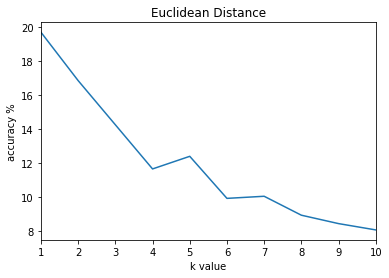

In [112]:
plt.plot(x, y)
plt.xlim(1, 10)
plt.xlabel('k value')
plt.ylabel('accuracy %')
plt.title('Euclidean Distance')
plt.show()

### Manhattan Distance Data

In [95]:
kVal = 1
accuraciesManhattan = []

while kVal < 11:
    accuracy = 0
    for currentIndex, currRow in newData.iterrows():
        neighbors = kNN(currRow, currentIndex, kVal)
        classType = classifyPopularType(currRow, neighbors)
        if (typeClass(currRow, classType)):
            accuracy += 1
            
    accuraciesManhattan.append(accuracy / 807)
    print('k:', kVal, '-', accuracy / 807)
    kVal += 1

k: 1 - 0.20446096654275092
k: 2 - 0.1771995043370508
k: 3 - 0.1524163568773234
k: 4 - 0.15117719950433706
k: 5 - 0.137546468401487
k: 6 - 0.12019826517967781
k: 7 - 0.11152416356877323
k: 8 - 0.10161090458488228
k: 9 - 0.09417596034696406
k: 10 - 0.0768277571251549


In [100]:
xM = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yM = []
for data in accuraciesManhattan:
    yM.append(data * 100)
print(yM)

[20.44609665427509, 17.71995043370508, 15.241635687732341, 15.117719950433706, 13.754646840148698, 12.01982651796778, 11.152416356877323, 10.161090458488228, 9.417596034696405, 7.68277571251549]


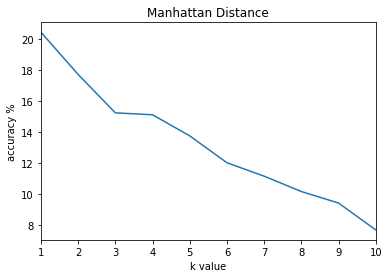

In [103]:
plt.plot(xM, yM)
plt.xlim(1, 10)
plt.xlabel('k value')
plt.ylabel('accuracy %')
plt.title('Manhattan Distance')
plt.show()

## Accuracy by Type

In [113]:
print(typeAccuracy)

[{'grass': 13, 'fire': 12, 'bug': 15, 'normal': 30, 'electric': 7, 'poison': 9, 'ground': 8, 'water': 24, 'fighting': 8, 'rock': 9, 'psychic': 7, 'steel': 2, 'dragon': 5, 'ice': 2, 'dark': 2, 'flying': 2, 'fairy': 3, 'ghost': 1}, {'grass': 10, 'fire': 9, 'bug': 9, 'normal': 24, 'electric': 5, 'poison': 7, 'psychic': 7, 'ground': 8, 'water': 19, 'fighting': 8, 'rock': 7, 'flying': 8, 'steel': 4, 'dragon': 4, 'dark': 2, 'fairy': 3, 'ghost': 1, 'ice': 1}, {'bug': 3, 'normal': 20, 'poison': 4, 'fire': 3, 'psychic': 11, 'grass': 5, 'ground': 9, 'water': 12, 'fighting': 6, 'rock': 8, 'flying': 15, 'steel': 5, 'dragon': 4, 'dark': 2, 'fairy': 4, 'ice': 1, 'electric': 3}, {'bug': 2, 'normal': 16, 'poison': 3, 'psychic': 8, 'ground': 8, 'water': 12, 'fighting': 5, 'flying': 13, 'rock': 7, 'steel': 4, 'dragon': 5, 'grass': 4, 'dark': 1, 'fairy': 4, 'fire': 1, 'electric': 1}, {'bug': 3, 'normal': 13, 'poison': 3, 'psychic': 10, 'ground': 8, 'water': 11, 'grass': 8, 'fighting': 5, 'rock': 6, 'flyi

In [115]:
numClasses = {}
for i, row in newData.iterrows():
    if row['Type 1'] not in numClasses:
        numClasses[row['Type 1']] = 1
    else:
        numClasses[row['Type 1']] += 1
        
    if row['Type 2'] not in numClasses:
        numClasses[row['Type 2']] = 1
    else:
        numClasses[row['Type 2']] += 1
print(numClasses)

{'grass': 97, 'poison': 66, 'fire': 64, nan: 402, 'flying': 98, 'water': 131, 'bug': 77, 'normal': 109, 'electric': 48, 'ground': 64, 'fairy': 47, 'fighting': 54, 'psychic': 82, 'rock': 60, 'steel': 47, 'ice': 34, 'ghost': 43, 'dragon': 45, 'dark': 46}


In [137]:
newTypeAccuracy = copy.deepcopy(typeAccuracy)

for k in newTypeAccuracy:
    for key in numClasses.keys():
        if key in k:
            k[key] = (k[key] / numClasses[key]) * 100

newTypeAccuracy

[{'grass': 13.402061855670103,
  'fire': 18.75,
  'bug': 19.480519480519483,
  'normal': 27.522935779816514,
  'electric': 14.583333333333334,
  'poison': 13.636363636363635,
  'ground': 12.5,
  'water': 18.3206106870229,
  'fighting': 14.814814814814813,
  'rock': 15.0,
  'psychic': 8.536585365853659,
  'steel': 4.25531914893617,
  'dragon': 11.11111111111111,
  'ice': 5.88235294117647,
  'dark': 4.3478260869565215,
  'flying': 2.0408163265306123,
  'fairy': 6.382978723404255,
  'ghost': 2.3255813953488373},
 {'grass': 10.309278350515463,
  'fire': 14.0625,
  'bug': 11.688311688311687,
  'normal': 22.018348623853214,
  'electric': 10.416666666666668,
  'poison': 10.606060606060606,
  'psychic': 8.536585365853659,
  'ground': 12.5,
  'water': 14.50381679389313,
  'fighting': 14.814814814814813,
  'rock': 11.666666666666666,
  'flying': 8.16326530612245,
  'steel': 8.51063829787234,
  'dragon': 8.88888888888889,
  'dark': 4.3478260869565215,
  'fairy': 6.382978723404255,
  'ghost': 2.32

In [136]:
for k in newTypeAccuracy:
    print('Num types not classified at all:', 18 - len(k.keys()))

Num types not classified at all: 0
Num types not classified at all: 0
Num types not classified at all: 1
Num types not classified at all: 2
Num types not classified at all: 1
Num types not classified at all: 1
Num types not classified at all: 4
Num types not classified at all: 2
Num types not classified at all: 4
Num types not classified at all: 2


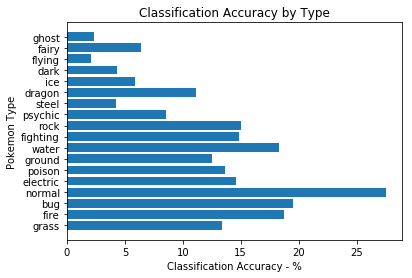

In [157]:
plt.barh(list(newTypeAccuracy[0].keys()), list(newTypeAccuracy[0].values()), align='center')
plt.ylabel('Pokemon Type')
plt.xlabel('Classification Accuracy - %')
plt.title('Classification Accuracy by Type')
plt.show()